In [17]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings(action='ignore')

In [15]:
#KNeighborsClassifier

In [27]:
classifier = KNeighborsClassifier(n_neighbors = 2)
training_points = [[0.5, 0.2, 0.1], [0.9, 0.7, 0.3], [0.4, 0.5, 0.7]]
training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)
unknown_points = [[0.2,  0.1, 0.7]]
guesses = classifier.predict(unknown_points)
print('guesses predict result : ', guesses)

guesses predict result :  [0]


In [28]:
training_points = [
    [158, 58],
    [158, 59],
    [158, 63],
    [160, 59],
    [160, 60],
    [163, 60],
    [163, 61],
    [160, 64],
    [163, 64],
    [165, 61],
    [165, 62],
    [165, 65],
    [168, 62],
    [168, 63],
    [168, 66],
    [170, 63],
    [170, 64],
    [170, 68]
]
training_labels = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
unknown_points = [[161, 61],]
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(training_points, training_labels)
guesses = classifier.predict(unknown_points)
print('guesses predict result : ', guesses)

guesses predict result :  [0]


In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [82]:
cancer = load_breast_cancer()
training_points = cancer.data
training_labels = cancer.target

X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.2, random_state=4)

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

In [83]:
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))
print(metrics.precision_score(y_test, guesses, average='binary'))
print(metrics.recall_score(y_test, guesses, average='binary'))
print(metrics.f1_score(y_test, guesses, average='binary'))

[[29  5]
 [ 9 71]]
0.8771929824561403
0.9342105263157895
0.8875
0.9102564102564101


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('heart.csv')

In [136]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,1


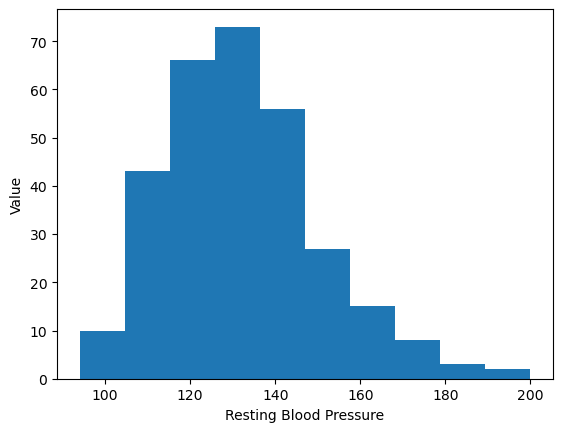

In [156]:
plt.hist(df['trestbps'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

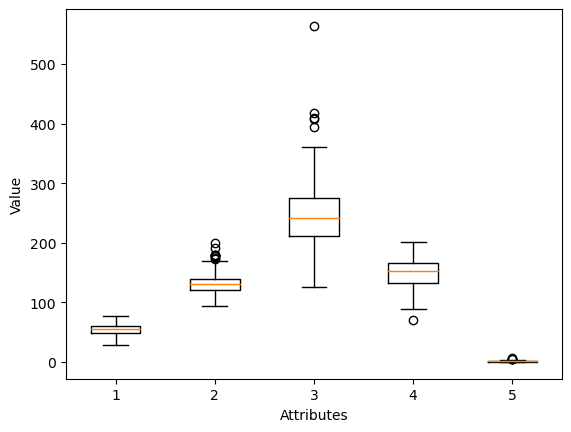

In [157]:
data_to_boxplot = [df['age'], df['trestbps'], df['chol'], df['thalach'], df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [158]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [159]:
training_points = df.drop(columns=['target'])
training_points = df.drop(columns=['thal'])
training_labels = df['target']
X_train, X_test, y_train, y_test = train_test_split(training_points,training_labels,test_size=0.3,random_state=4)

In [161]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
[[54  3]
 [26  8]]
0.6813186813186813


[0.6923076923076923, 0.6593406593406593, 0.6923076923076923, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6813186813186813, 0.6593406593406593, 0.6593406593406593, 0.6593406593406593, 0.6703296703296703, 0.6593406593406593, 0.6483516483516484, 0.6483516483516484, 0.6703296703296703, 0.6593406593406593, 0.6593406593406593, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6373626373626373, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264]


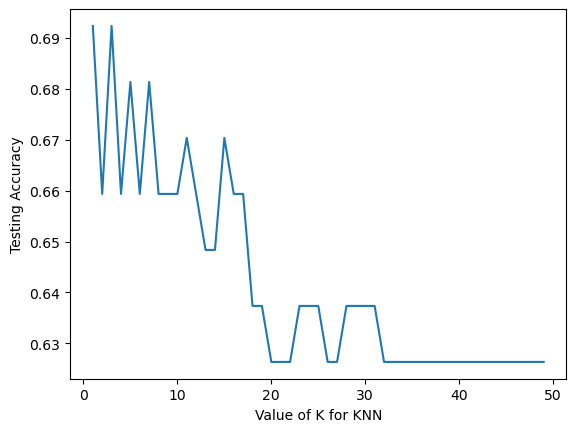

In [163]:
k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = MinMaxScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
training_points = df_model.drop(columns=['target'])
training_points = df_model.drop(columns=['thal'])
training_labels = df_model['target']

In [165]:
df_model

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0,fixed,0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,0.241935,2,3,normal,1
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,0.419355,2,2,reversible,0
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0,normal,0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.479167,1,1,0.226415,0.136986,0,2,0.908397,0,0.000000,2,0,fixed,0
299,0.291667,0,4,0.358491,0.490868,1,2,0.496183,1,0.483871,2,0,reversible,1
300,0.750000,1,4,0.386792,0.292237,0,2,0.427481,0,0.451613,2,1,reversible,1
301,0.395833,1,4,0.339623,0.296804,1,2,0.603053,1,0.000000,1,2,reversible,1


In [166]:
X_train, X_test, y_train, y_test = train_test_split(training_points,training_labels,test_size=0.3,random_state=4)

[0.945054945054945, 0.9010989010989011, 0.978021978021978, 0.978021978021978, 0.978021978021978, 0.9230769230769231, 0.9340659340659341, 0.9230769230769231, 0.9560439560439561, 0.945054945054945, 0.967032967032967, 0.9560439560439561, 0.945054945054945, 0.9560439560439561, 0.9560439560439561, 0.967032967032967, 0.9560439560439561, 0.9230769230769231, 0.9340659340659341, 0.9340659340659341, 0.9340659340659341, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.8901098901098901, 0.9120879120879121, 0.9120879120879121, 0.9120879120879121, 0.8901098901098901, 0.9010989010989011, 0.8461538461538461, 0.8791208791208791, 0.8131868131868132, 0.8461538461538461, 0.8131868131868132, 0.8351648351648352, 0.8131868131868132, 0.8131868131868132, 0.8131868131868132, 0.8131868131868132, 0.8131868131868132, 0.8131868131868132, 0.8021978021978022, 0.8021978021978022, 0.7802197802197802, 0.7802197802197802]


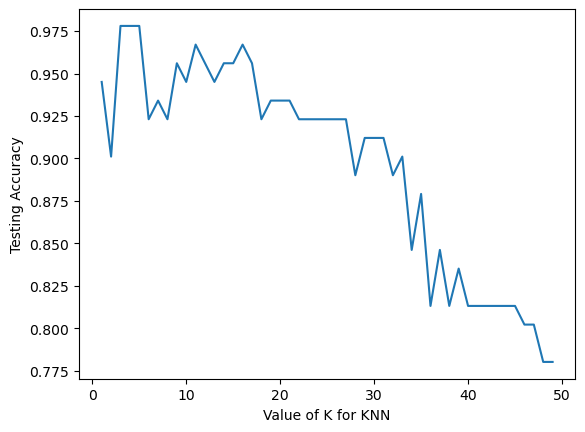

In [167]:
k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [168]:
from sklearn.cluster import KMeans

In [203]:
X = np.array([[2, 10], [2, 5], [8, 4],[5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
kmeans = KMeans(n_clusters=3).fit(X)

In [211]:
print("Labels: ", kmeans.labels_)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Predict Values: ", kmeans.predict([[1, 1]]))

Labels:  [1 2 0 1 0 0 2 1]
Cluster Centers:  [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
Predict Values:  [2]


In [212]:
from sklearn.cluster import DBSCAN

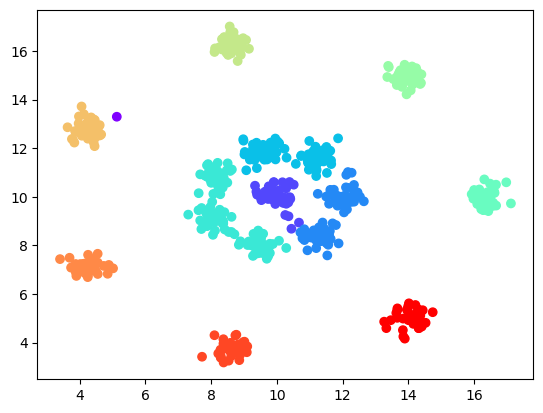

In [222]:
sample_df = pd.read_csv("r15.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]
dbscan = DBSCAN(eps=0.6, min_samples=10).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=dbscan.labels_,cmap='rainbow')
plt.show()

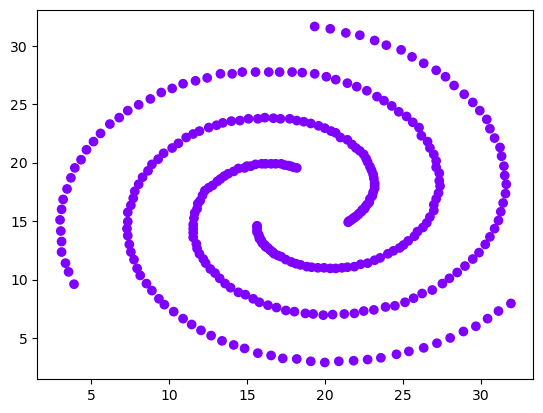

In [223]:
sample_df = pd.read_csv("spiral.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]
dbscan = DBSCAN(eps=0.6, min_samples=10).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=dbscan.labels_,cmap='rainbow')
plt.show()

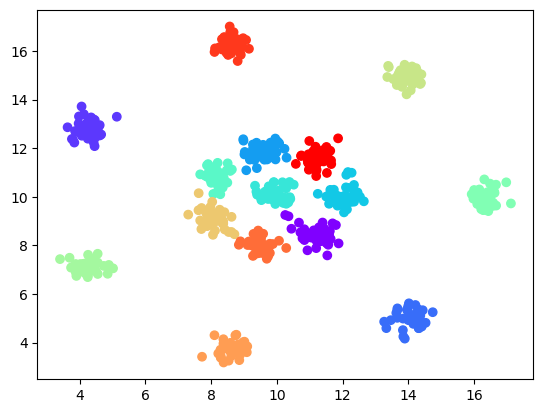

In [224]:
from sklearn.cluster import AgglomerativeClustering

sample_df = pd.read_csv("r15.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]
agglo = AgglomerativeClustering(n_clusters=15).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=agglo.labels_,cmap='rainbow')
plt.show()

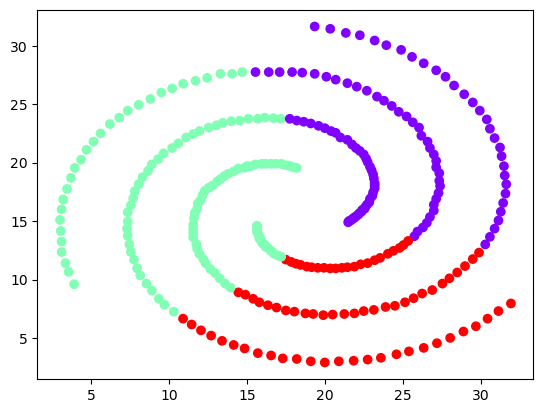

In [225]:
sample_df = pd.read_csv("spiral.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]
agglo = AgglomerativeClustering(n_clusters=3).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=agglo.labels_,cmap='rainbow')
plt.show()

In [226]:
from sklearn.metrics.cluster import adjusted_rand_score

In [227]:
sample_df = pd.read_csv("r15.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]
kmeans = KMeans(n_clusters=15).fit(training_points)
arc = adjusted_rand_score(training_labels, kmeans.labels_)
print(arc)

0.9927781994136302


In [228]:
sample_df = pd.read_csv("spiral.csv")
training_points = sample_df[["col1", "col2"]]
training_labels = sample_df["target"]
dbscan = DBSCAN(eps=3, min_samples=2).fit(training_points)
arc = adjusted_rand_score(training_labels, dbscan.labels_)
print(arc)


1.0
